<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 5

### Problem 0 (3 points)

## Part 1: The Logistic-Regression Classifier in One Dimension

In [298]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall21', course='371d', homework=5):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [299]:
import pickle


file_name = 'data1d.pkl'
retrieve(file_name, homework=5)
with open(file_name, 'rb') as file:
    t = pickle.load(file)
tx, ty = t['x'], t['y']

Using previously downloaded file data1d.pkl


### Problem 1.1 (Exam Style)

By definition of the cross-entropy loss,
$$l(y,p) = -ylogp - (1-y) log(1-p)$$
<br> If we substitute the logistic function f(a) for p where 
$$f(a) = \frac{1}{1+e^{-a}}\\
l(y,f(a)) = -ylog(\frac{1}{1+e^{-a}}) - (1-y) log(1-\frac{1}{1+e^{-a}})\\
= -ylog(\frac{1}{1+e^{-a}}) - (1-y) log(\frac{e^{-a}}{1+e^{-a}})\\
= -y(log(1)-log(1+e^{-a})) - (1-y)(log(e^{-a})-log(1+e^{-a}))\\
= -y(0-log(1+e^{-a})) - (1-y)(-a-log(1+e^{-a}))\\
= ylog(1+e^{-a})+(1-y)(a+log(1+e^{-a}))\\
= ylog(1+e^{-a})+a+log(1+e^{-a})-ya-ylog(1+e^{-a})\\
= a+log(1+e^{-a})-ya\\
=(1-y)a+log(1+e^{-a})
$$
as required

### Problem 1.2 (Exam Style)

$$l(a)=(1-y)a+log(1+e^{-a})\\
l'(a)=1-y-log(1+e^{-a})e^{-a}\\
l''(a)=-log(1+e^{-a})(-e^{-a})+log(1+e^{-a})e^{-a}e^{-a}\\
=log(1+e^{-a})e^{-a}+log(1+e^{-a})e^{-a}e^{-a}\\
=e^{-a}(e^{-a}+1)log(e^{-a}+1)$$

The exponential function $e^{-a}$ is always positive over real number a, 
$$e^{-a}>0\\
e^{-a}+1>0$$
And because the exponential function is strictly increasing,
$$log(e^-a+1)>log(1)=0$$
therefore the second derivative of the function $l(y,f(a))$ is always positive
$$l''(x) (a)>0 $$
Therefore, $l(y,f(a))$ is globally a strict convex function of a.

### Problem 1.3 (Exam Style)

The chain rule implies that a convex function taken over an affine function is still convex.

### Problem 1.4 (Exam Style)

N samples

F false, N-F true

w=0,b=b

$$L_T(b,w)=\frac{1}{N}\sum_{n=1}^{N} ℓ(y_n,s(x_n))\\
L_T(b,0)=\frac{1}{N}\sum_{n=1}^{N} ℓ(y_n,s(x_n))\\
L_T(b,0)=\frac{1}{N}\sum_{n=1}^{N} ℓ(y_n,f(α(x_n)))\\
L_T(b,0)=\frac{1}{N}\sum_{n=1}^{N} ℓ(y_n,f(b+wx))\\
L_T(b,0)=\frac{1}{N}\sum_{n=1}^{N} ℓ(y_n,f(b))\\
ℓ(y,p)=−ylogp−(1−y)log(1−p)\\
ℓ(y_n,f(b))=−y_nlog(f(b))−(1−y_n)log(1−f(b))\\
ℓ(y_n,f(b))=−y_nlog(\frac{1}{1+e^{-b}})−(1−y_n)log(1−\frac{1}{1+e^{-b}})\\
ℓ(0,f(b))=log(1−\frac{1}{1+e^{-a}})\\
ℓ(0,f(b))=log(1−\frac{1}{1+e^{-a}})\\
ℓ(1,f(b))=-log(\frac{1}{1+e^{-a}})\\
ℓ(0,f(b))=b+log(1+e^{-b})\\
ℓ(1,f(b))=log(1+e^{-b})\\
L_T(b,0)=\frac{F}{N}(b)+log(1+e^{-b})\\
L_T(0,0)=\frac{F}{N}(0)+log(1+e^{-0})\\
=log(2)\\$$

### Problem 1.5

In [300]:
import numpy as np
import matplotlib.pyplot as plt
import math

def logistic(a):
    return 1 / (1 + np.exp(-a))
    
def affine(x, v):
    return v[0]+np.dot(v[1],x)
    
def score(x, v):
    return logistic(affine(x,v))

def h(x, v):
    return score(x,v) > 0.5

In [301]:
def plot_score(x, y, v, loss_name, x_bound, n_points, type_size):

    fig, ax = plt.subplots()
    ax.plot(x, y, "o")

    bounds = np.linspace(-x_bound, x_bound, n_points)
    ax.plot(bounds, score(bounds, v))
    q = h(bounds, v)
    ax.plot(bounds, q)

    ax.set_title("Score and Predictor using " + loss_name, fontsize=type_size)

    ax.set_ylabel("y", fontsize=type_size)
    for i in range(n_points):
        if q[i] != q[i + 1]:
            boundary = bounds[i]
            break
    ax.set_xlabel(
        "x (decision boundary) " + str(round(boundary, 3)) + ")", fontsize=type_size
    )

    fig.figsize = (15, 5)

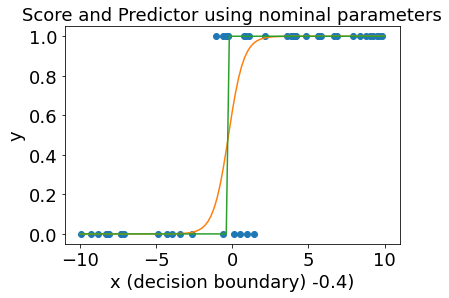

In [302]:
v_hat_test = np.array((0.5, 2.))
plot_score(tx, ty, v_hat_test, 'nominal parameters',
    x_bound=10., n_points=101, type_size=18)

### Problem 1.6

In [311]:
def cross_entropy(y, p):
    int_y = y.astype(int)
    
    out = 0
    
    for i in range(len(p)):
        if int_y[i] == 1:
            out+=-int_y[i]*np.log(p[i])
        else:
            out+=-(1-int_y[i])*np.log(1-p[i])
    return out

def sample_loss(x, y, v, loss=cross_entropy):
    return loss(y, score(x, v))

def risk(v, x, y, loss=cross_entropy):
    return (1/x.shape[0]) * sample_loss(x, y, v)

In [312]:
from scipy.optimize import minimize

def train(x, y, loss=cross_entropy):
    #return vector or b and w that minimize risk
    v_0 = np.array((0, 0))
    return minimize(fun=risk, x0=v_0, args=(x,y), method='CG').x

In [313]:
v_hat_ce = train(tx, ty)
print(v_hat_ce)

[0.47471978 0.77146507]


### Problem 1.7

In [314]:
import pandas as pd
import matplotlib

In [315]:
def plot_losses(x, y, v, loss_fct, loss_name, type_size):
    figsize=(15, 5)
    
    best_v = v

    losses = [sample_loss(x[i], y[i], best_v, loss=loss_fct) for i in range(len(x))]

    for i in range(len(losses)):
        if losses[i] > 1:
            print(x[i], y[i], losses[i], score(x[i], best_v))
            
    predictions = [h(x[i],best_v) for i in range(len(x))]
    
    #plt.scatter(x, y,  marker='o')
    
    outputs = []
    for i in range(len(predictions)):
        if y[i] == predictions[i]:
            if predictions[i] == 1:
                outputs.append('TP')
            else:
                outputs.append('TN')
        else:
            if predictions[i] == 1:
                outputs.append('FP')
            else:
                outputs.append('FN')
            
    my_df = pd.DataFrame(dict(output=outputs))
    
    colormap = {
      'TP' : 'blue',
      'TN' : 'red',
      'FP' : 'orange',
      'FN' : 'green'
    }

    plt.scatter(x, losses, marker='o', c=my_df["output"].map(colormap))
    #TP- blue, TN- red, FP- orange, FN- green
    #TP - y=1,pred>0.5
    #TN - y=0,pred<0.5
    #FP = y=0, pred>0.5
    #FN - y=1,pred<0.5
    
    plt.axvline()
    
    plt.rcParams.update({'font.size': type_size})
    plt.title('Training Point Losses. Decision Boundary x = {x}. Risk = {risk}'.format(x=0,risk=2))
    #plt.legend(["TP", "TN", "FP", "FN"])
    plt.xlabel('x')
    plt.ylabel(loss_name)
    
    plt.show()  

In [316]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

def plot_contours(x, y, v, loss_fct, loss_name, n_points, type_size, fig_size=(15, 12)):
    b_hat, w_hat = v[0], v[1]
    b_range, w_range = [b_hat - 3., b_hat + 3.], [-0.1, w_hat + 5.]
    box = b_range + w_range
    bs = np.linspace(b_range[0], b_range[1], n_points)
    ws = np.linspace(w_range[0], w_range[1], n_points)
    r_grid = np.array([[risk(np.array((b, w)), x, y, loss_fct) for b in bs] for w in ws])
    b_grid, w_grid = np.meshgrid(bs, ws)
    fig = plt.figure(figsize=fig_size, tight_layout=True)
    img = plt.imshow(r_grid, interpolation='bilinear',
                     origin='lower', extent=box, cmap=cm.hot)
    plt.contour(b_grid, w_grid, r_grid, 50, colors='w', linewidths=1)
    plt.axis('scaled')
    plt.xlabel('b', fontsize=type_size)
    plt.ylabel('w', fontsize=type_size)
    bar = fig.colorbar(img)
    bar.ax.tick_params(labelsize=type_size)
    title = 'Risk Using {}'
    plt.title(title.format(capitalize(loss_name)), fontsize=type_size)
    plt.show()

In [317]:
ce_name = 'cross entropy loss'
x_bound, n_points = 10., 101
type_size = 18

NameError: name 'capitalize' is not defined

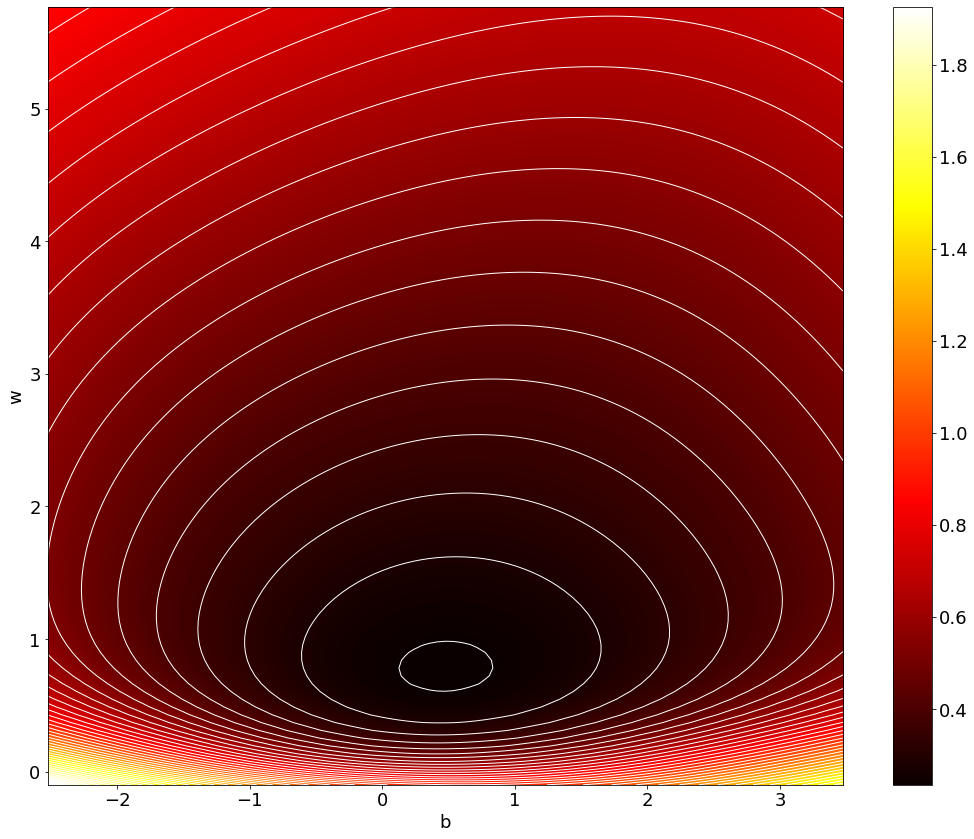

In [318]:
plot_contours(tx, ty, v_hat_ce, cross_entropy, ce_name, n_points, type_size)

In [236]:
# plot_score(tx, ty, v_hat_ce, ce_name, x_bound, n_points, type_size)

1.4509503916477797 False 1.7789746838168523 0.831188856637222
0.48300808182310284 False 1.2040050407408136 0.700009670768587
0.9914707107446983 False 1.4938580030145614 0.7754951577554872


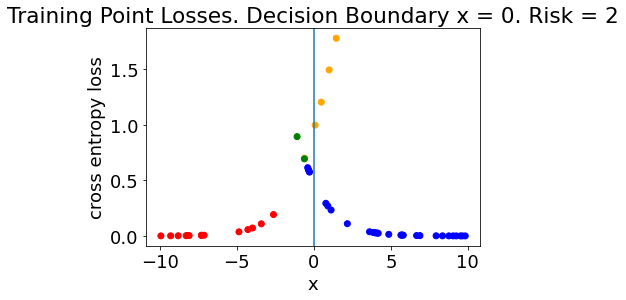

In [237]:
plot_losses(tx, ty, v_hat_ce, cross_entropy, ce_name, type_size)

### Problem 1.8

In [ ]:
# v_hat_q = train(tx, ty, loss=quadratic)
q_name = 'quadratic loss'

In [ ]:
# plot_score(tx, ty, v_hat_q, q_name, x_bound, n_points, type_size)

In [ ]:
#plot_losses(tx, ty, v_hat_q, quadratic, q_name, type_size)

In [ ]:
# plot_contours(tx, ty, v_hat_q, quadratic, q_name, n_points, type_size)

### Problem 1.9 (Exam Style)

According to the definition of convexity, the function is convex if for all z,z' in the (open) domain of f and for all u ∈ (0,1) 
$$f(uz + (1-u)z')\leqslant uf(z) +(1-u)f(z')$$
The risk with the quadratic loss as shown by the isocontours in 1.8 is not convex in the top left corner parabola region: there are shades that are more yellow than shades that are red, so for a line segment between two points that cross the region, it has strictly higher values instead of below the isocontour. 
<br> More specificly, violation of convexity occurs at around where b is between -1 and 0 and w is between 4 and 5. Here, it seems that a line segment through two points on the loss would be outside the surface of the function, violating the definition of convexity.

### Problem 1.10

In [ ]:
file_name_sep = 'data1d_sep.pkl'
retrieve(file_name_sep)
with open(file_name_sep, 'rb') as file:
    t_sep = pickle.load(file)
tx_sep, ty_sep = t_sep['x'], t_sep['y']

### Problem 1.11

### Problem 1.12 (Exam Style)

### Problem 1.13

### Problem 1.14 (Exam Style)

### Problem 1.15